<a href="https://colab.research.google.com/github/cy643/generative_ai/blob/main/0311_hw4/0311_hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 請解釋雙目視差計算的基本原理，並提供 Python 實作範例。


In [20]:
# 下載示例立體影像 (KITTI dataset)
!wget -O left_image.png https://raw.githubusercontent.com/opencv/opencv/master/samples/data/aloeL.jpg
!wget -O right_image.png https://raw.githubusercontent.com/opencv/opencv/master/samples/data/aloeR.jpg

--2025-03-24 03:47:42--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/aloeL.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 315069 (308K) [image/jpeg]
Saving to: ‘left_image.png’

left_image.png      100%[===================>] 307.68K  --.-KB/s    in 0.005s  

2025-03-24 03:47:42 (57.8 MB/s) - ‘left_image.png’ saved [315069/315069]

--2025-03-24 03:47:42--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/aloeR.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 315113 (308K) [image/jp

####1. ChatGPT-4o的回答與範例程式

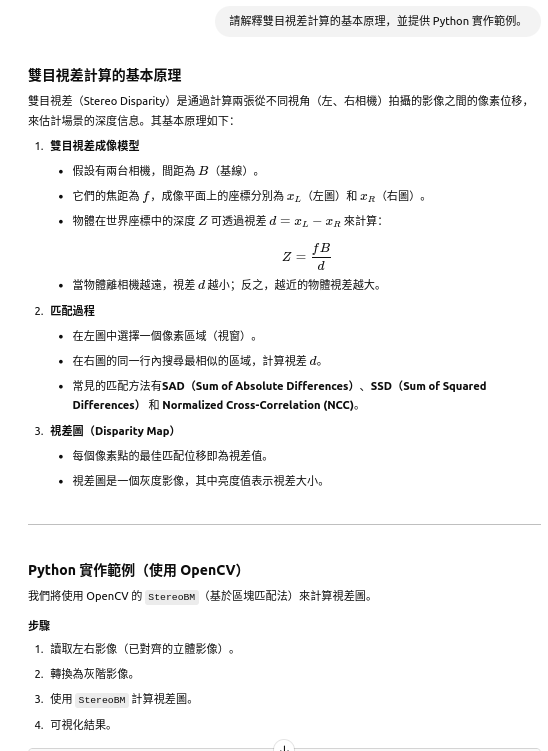

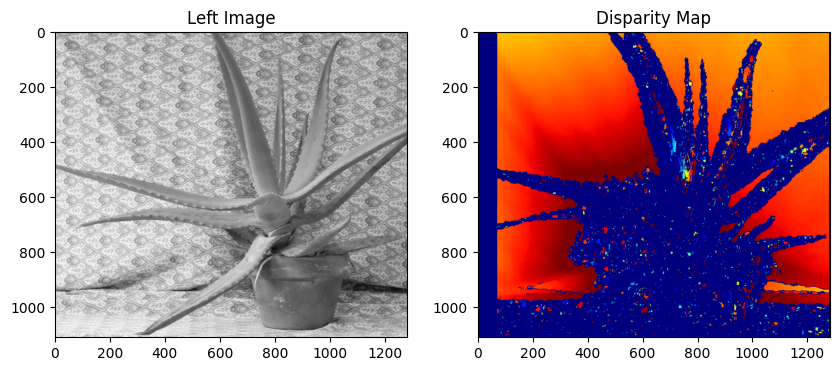

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 讀取左右影像
left_img = cv2.imread('left_image.png', cv2.IMREAD_GRAYSCALE)
right_img = cv2.imread('right_image.png', cv2.IMREAD_GRAYSCALE)

# 初始化視差計算器 (StereoBM)
stereo = cv2.StereoBM_create(numDisparities=64, blockSize=15)

# 計算視差圖
disparity = stereo.compute(left_img, right_img)

# 視差圖後處理（轉換為可視化格式）
disparity = cv2.normalize(disparity, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
disparity = np.uint8(disparity)

# 顯示結果
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(left_img, cmap='gray'), plt.title('Left Image')
plt.subplot(1,2,2), plt.imshow(disparity, cmap='jet'), plt.title('Disparity Map')
plt.show()

####2. Google Gimini 2.0的回答與範例程式

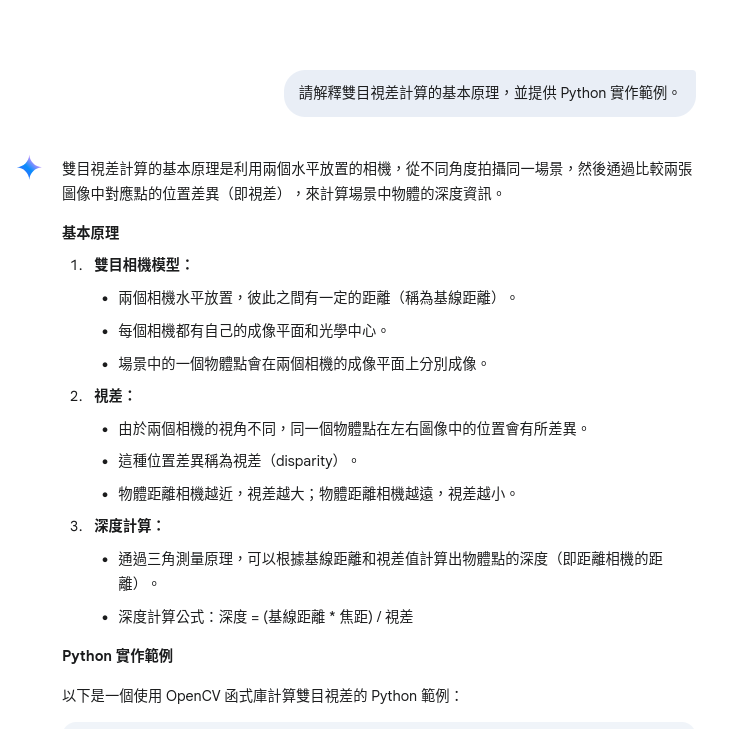

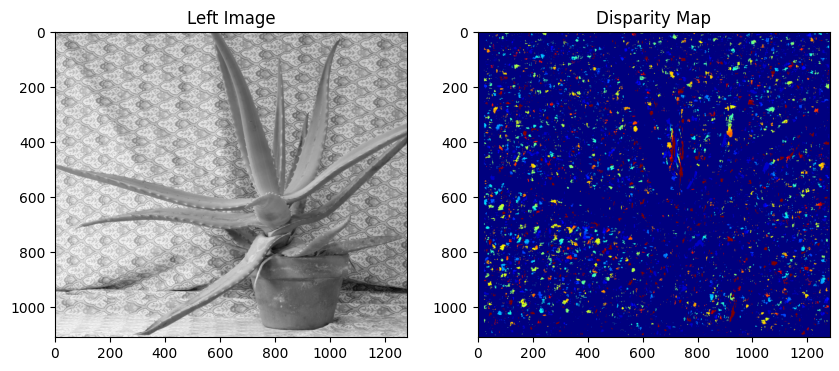

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_disparity(left_image, right_image):
    """
    計算雙目視差圖。

    參數：
        left_image: 左圖像 (灰階)。
        right_image: 右圖像 (灰階)。

    返回：
        視差圖。
    """

    # 創建 StereoBM 物件
    stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)

    # 計算視差圖
    disparity = stereo.compute(left_image, right_image)

    return disparity


# 讀取左右圖像
left_image = cv2.imread('left_image.png', cv2.IMREAD_GRAYSCALE)
right_image = cv2.imread('right_image.png', cv2.IMREAD_GRAYSCALE)

# 計算視差圖
disparity_map = calculate_disparity(left_image, right_image)

# 顯示視差圖
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(left_img, cmap='gray'), plt.title('Left Image')
plt.subplot(1,2,2), plt.imshow(disparity_map, cmap='jet'), plt.title('Disparity Map')
plt.show()

#### 生成結果比較
1. ChatGPT敘述雙目視差匹配流程與常用評估方法，但Gimini主要在解釋雙目視差的概念。可能因為我常常詢問ChatGPT相關的問題，ChatGPT預設使用者具備一定知識進行說明;Gimini預設使用者完全不理解何謂雙目視差，因此選擇更口語的說明方式。

2. 兩個LLM都選用cv2.StereoBM_create這個工具進行視差匹配，但ChatGPT的參數設定(numDisparities=64, blockSize=14)相較Gimini的設定(numDisparities=16, blockSize=15)表現更好。

3. ChatGPT在計算完視差圖後有進行正歸化後處理，Gimini是直接輸出原視插圖。